# L3: Large Multimodal Models (LMMs)

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px"> ⏳ <b>Note <code>(Kernel Starting)</code>:</b> This notebook takes about 30 seconds to be ready to use. You may start and watch the video while you wait.</p>

* In this classroom, the libraries have been already installed for you.
* If you would like to run this code on your own machine, you need to install the following:
```
    !pip install google-generativeai

```

Note: don't forget to set up your GOOGLE_API_KEY to use the Gemini Vision model in the env file.
```
   %env GOOGLE_API_KEY=************
```
Check the [documentation](https://ai.google.dev/gemini-api/docs/api-key) for more infomation.

In [1]:
import warnings
warnings.filterwarnings('ignore')

## Setup
### Load environment variables and API keys

In [2]:
import os
from dotenv import load_dotenv, find_dotenv

_ = load_dotenv(find_dotenv()) # read local .env file
GOOGLE_API_KEY=os.getenv('GOOGLE_API_KEY')

In [3]:
# Set the genai library
import google.generativeai as genai
from google.api_core.client_options import ClientOptions

genai.configure(
        api_key=GOOGLE_API_KEY,
        transport="rest",
        client_options=ClientOptions(
            api_endpoint=os.getenv("GOOGLE_API_BASE"),
        ),
)

> Note: learn more about [GOOGLE_API_KEY](https://ai.google.dev/) to run it locally.

## Helper functions

In [4]:
import textwrap
import PIL.Image
from IPython.display import Markdown, Image

def to_markdown(text):
    text = text.replace('•', '  *')
    return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))


* Function to call LMM (Large Multimodal Model).

In [5]:
def call_LMM(image_path: str, prompt: str) -> str:
    # Load the image
    img = PIL.Image.open(image_path)

    # Call generative model
    model = genai.GenerativeModel('gemini-pro-vision')
    response = model.generate_content([prompt, img], stream=True)
    response.resolve()

    return to_markdown(response.text)  

## Analyze images with an LMM

In [6]:
# Pass in an image and see if the LMM can answer questions about it
Image(url= "SP-500-Index-Historical-Chart.jpg")

In [7]:
# Use the LMM function
call_LMM("SP-500-Index-Historical-Chart.jpg", 
    "Explain what you see in this image.")

>  The image shows the historical chart of the S&P 500 index, which is a stock market index that tracks the 500 largest publicly traded companies in the United States. The chart shows the index's value over time, from 1960 to 2022. The index has generally gone up over time, with some notable dips along the way, such as in 1987 and 2008. The index has been on an overall upward trend for the past 60 years.

## Analyze a harder image

* Try something harder: Here's a figure we explained previously!

In [8]:
Image(url= "clip.png")

In [9]:
call_LMM("clip.png", 
    "Explain what this figure is and where is this used.")

>  This figure shows a contrastive pre-training framework for learning image-text representations. 
> Given a batch of images and their corresponding texts, the text encoder encodes each text into a text embedding. The image encoder encodes each image into an image embedding. 
> To learn contrastive representations, the model maximizes the similarity between the embeddings of images and their corresponding texts while minimizing the similarity between the embeddings of different images and texts. 
> This framework is often used for image retrieval, image captioning, and other tasks that require understanding the relationship between images and text.

## Decode the hidden message

<p style="background-color:#fff6ff; padding:15px; border-width:3px; border-color:#efe6ef; border-style:solid; border-radius:6px"> 💻 &nbsp; <b>Access Utils File and Helper Functions:</b> To access the files for this notebook, 1) click on the <em>"File"</em> option on the top menu of the notebook and then 2) click on <em>"Open"</em>. For more help, please see the <em>"Appendix - Tips and Help"</em> Lesson.</p>


In [10]:
Image(url= "blankimage3.png")

In [11]:
# Ask to find the hidden message
call_LMM("blankimage3.png", 
    "Read what you see on this image.")

>  You can vectorize the whole world with Weaviate!

## How the model sees the picture!

> You have to be careful! The model does not "see" in the same way that we see!

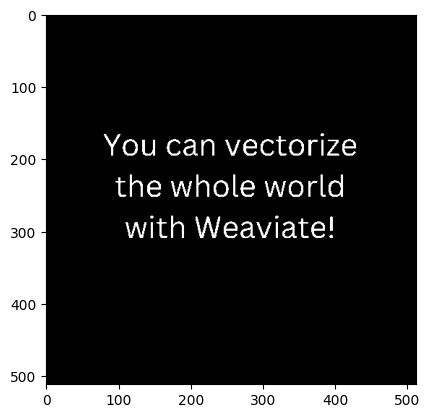

In [12]:
import imageio.v2 as imageio
import numpy as np
import matplotlib.pyplot as plt

image = imageio.imread("blankimage3.png")

# Convert the image to a NumPy array
image_array = np.array(image)

plt.imshow(np.where(image_array[:,:,0]>120, 0,1), cmap='gray');

### Try it yourself!

**EXTRA!**  You can use the function below to create your own hidden message, into an image:

In [13]:
# Create a hidden text in an image
def create_image_with_text(text, font_size=20, font_family='sans-serif', text_color='#73D955', background_color='#7ED957'):
    fig, ax = plt.subplots(figsize=(5, 5))
    fig.patch.set_facecolor(background_color)
    ax.text(0.5, 0.5, text, fontsize=font_size, ha='center', va='center', color=text_color, fontfamily=font_family)
    ax.axis('off')
    plt.tight_layout()
    return fig

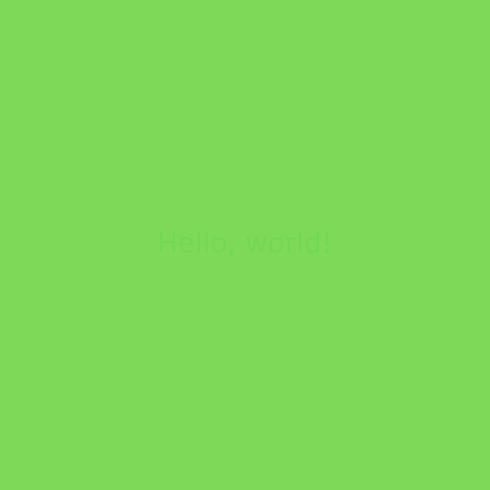

In [14]:
# Modify the text here to create a new hidden message image!
fig = create_image_with_text("Hello, world!") 

# Plot the image with the hidden message
plt.show()
fig.savefig("extra_output_image.png")

In [15]:
# Call the LMM function with the image just generated
call_LMM("extra_output_image.png", 
    "Read what you see on this image.")

>  Hello, world!

* It worked!, now plot the image decoding the message.

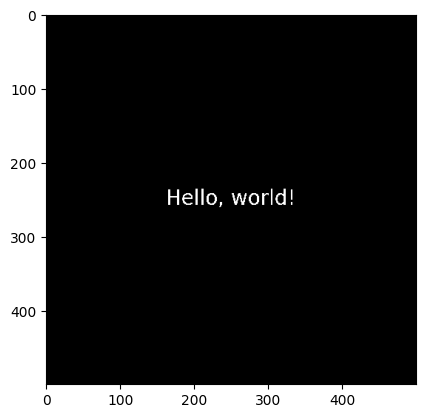

In [16]:
image = imageio.imread("extra_output_image.png")

# Convert the image to a NumPy array
image_array = np.array(image)

plt.imshow(np.where(image_array[:,:,0]>120, 0,1), cmap='gray');